<a href="https://colab.research.google.com/github/ppijbb/Keras_jupyter/blob/main/Naver_Movie_Rank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3장 후반부 코드 (Choi)

3-9 없음.  

## 3-10 네이버 영화 평점 기준 영화의 평점 변화 확인하기

In [ ]:
from bs4 import BeautifulSoup  
import pandas as pd

In [ ]:
from urllib.request import urlopen

url = "http://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cur&date=20190920"
# 현재 상영 영화 평점순

page = urlopen(url)

soup = BeautifulSoup(page, "html.parser")
soup


<!DOCTYPE html>

<html lang="ko">
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="http://imgmovie.naver.com/today/naverme/naverme_profile.jpg" property="me2:image">
<meta content="네이버영화 " property="me2:post_tag">
<meta content="네이버영화" property="me2:category1"/>
<meta content="" property="me2:category2"/>
<meta content="랭킹 : 네이버 영화" property="og:title"/>
<meta content="영화, 영화인, 예매, 박스오피스 랭킹 정보 제공" property="og:description"/>
<meta content="article" property="og:type"/>
<meta content="https://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cur&amp;date=20190920" property="og:url"/>
<meta content="http://static.naver.net/m/movie/icons/OG_270_270.png" property="og:image"/><!-- http://static.naver.net/m/movie/im/navermovie.jpg -->
<meta content="http://imgmovie.naver.com/today/naverme/naverme_profile.jpg" property="og:article:thumbnailUrl"/>
<meta content="네이버 영화" property="og:article:author"/>


### 태그 클래스 찾기
http://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cur&date=20190920 가서  
현재 상영 영화 평점순에서  
아래의 나타나는 제목에 대한 태그와 클래스 이름을    
개발자도구(F12) 로 찾아 본다.


In [ ]:
soup.find_all('div', 'tit5')

[<div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=179518" title="주전장">주전장</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=181700" title="안녕 베일리">안녕 베일리</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=163788" title="알라딘">알라딘</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=34324" title="집으로...">집으로...</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=182348" title="로망">로망</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=183132" title="교회오빠">교회오빠</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=164907" title="레드슈즈">레드슈즈</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=101966" title="토이 스토리 4">토이 스토리 4</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=31882" title="물랑 루즈">물랑 루즈</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=177335" title="타샤 튜더">타샤 튜더</a>
 </div>, <div class="tit5">
 <a href="

In [ ]:
# 값을 찾아 가기.
soup.find_all('div', 'tit5')[0]

<div class="tit5">
<a href="/movie/bi/mi/basic.nhn?code=179518" title="주전장">주전장</a>
</div>

In [ ]:
soup.find_all('div', 'tit5')[0].a

<a href="/movie/bi/mi/basic.nhn?code=179518" title="주전장">주전장</a>

In [ ]:
# 값을 찾음.
soup.find_all('div', 'tit5')[0].a.string

'주전장'

### 평점 찾기
http://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cur&date=20190920 가서
평점의 태그와 클래스 이름을
개발자도구(F12) 로 찾아 본다

In [ ]:
soup.find_all('td', 'point')

[<td class="point">9.54</td>,
 <td class="point">9.43</td>,
 <td class="point">9.39</td>,
 <td class="point">9.34</td>,
 <td class="point">9.30</td>,
 <td class="point">9.27</td>,
 <td class="point">9.25</td>,
 <td class="point">9.08</td>,
 <td class="point">9.06</td>,
 <td class="point">9.04</td>,
 <td class="point">8.96</td>,
 <td class="point">8.92</td>,
 <td class="point">8.88</td>,
 <td class="point">8.84</td>,
 <td class="point">8.78</td>,
 <td class="point">8.74</td>,
 <td class="point">8.60</td>,
 <td class="point">8.59</td>,
 <td class="point">8.48</td>,
 <td class="point">8.46</td>,
 <td class="point">8.33</td>,
 <td class="point">8.32</td>,
 <td class="point">8.05</td>,
 <td class="point">7.97</td>,
 <td class="point">7.90</td>,
 <td class="point">7.90</td>,
 <td class="point">7.75</td>,
 <td class="point">7.62</td>,
 <td class="point">7.56</td>,
 <td class="point">7.55</td>,
 <td class="point">7.45</td>,
 <td class="point">7.28</td>,
 <td class="point">6.97</td>,
 <td class

In [ ]:
len(soup.find_all('td', 'point'))
# 50개 까지 표시하는데 현재 개봉 영화 수가 작은 경우 50 이하이기도 함.

39

In [ ]:
soup.find_all('td', 'point')[0].string

'9.54'

In [ ]:
n_movie = len(soup.find_all('div', 'tit5'))
n_movie

39

In [ ]:
movie_name = [soup.find_all('div', 'tit5')[n].a.string for n in range(0, n_movie-1)]
movie_name

['주전장',
 '안녕 베일리',
 '알라딘',
 '집으로...',
 '로망',
 '교회오빠',
 '레드슈즈',
 '토이 스토리 4',
 '물랑 루즈',
 '타샤 튜더',
 '벌새',
 '마담 프루스트의 비밀정원',
 '세상을 바꾼 변호인',
 '김복동',
 '우리집',
 '본 투 비 블루',
 '안나',
 '라라랜드',
 '기생충',
 '졸업',
 '엑시트',
 '블라인드 멜로디',
 '애드 아스트라',
 '죄 많은 소녀',
 '분노의 질주: 홉스&쇼',
 '봉오동 전투',
 '김군',
 '힘을 내요, 미스터 리',
 '예스터데이',
 '극장판 헬로카봇 : 달나라를 구해줘!',
 '안녕, 티라노: 영원히, 함께',
 '47미터 2',
 '변신',
 '나쁜 녀석들: 더 무비',
 '광대들: 풍문조작단',
 '그것: 두 번째 이야기',
 '유열의 음악앨범',
 '타짜: 원 아이드 잭']

In [ ]:
movie_point = [soup.find_all('td', 'point')[n].string for n in range(0, n_movie-1)]
movie_point

['9.54',
 '9.43',
 '9.39',
 '9.34',
 '9.30',
 '9.27',
 '9.25',
 '9.08',
 '9.06',
 '9.04',
 '8.96',
 '8.92',
 '8.88',
 '8.84',
 '8.78',
 '8.74',
 '8.60',
 '8.59',
 '8.48',
 '8.46',
 '8.33',
 '8.32',
 '8.05',
 '7.97',
 '7.90',
 '7.90',
 '7.75',
 '7.62',
 '7.56',
 '7.55',
 '7.45',
 '7.28',
 '6.97',
 '6.79',
 '6.22',
 '6.22',
 '6.10',
 '5.48']

### 지난 100 일간의 추세

In [ ]:
date = pd.date_range('2019-5-10', periods=100, freq='D')
date

DatetimeIndex(['2019-05-10', '2019-05-11', '2019-05-12', '2019-05-13',
               '2019-05-14', '2019-05-15', '2019-05-16', '2019-05-17',
               '2019-05-18', '2019-05-19', '2019-05-20', '2019-05-21',
               '2019-05-22', '2019-05-23', '2019-05-24', '2019-05-25',
               '2019-05-26', '2019-05-27', '2019-05-28', '2019-05-29',
               '2019-05-30', '2019-05-31', '2019-06-01', '2019-06-02',
               '2019-06-03', '2019-06-04', '2019-06-05', '2019-06-06',
               '2019-06-07', '2019-06-08', '2019-06-09', '2019-06-10',
               '2019-06-11', '2019-06-12', '2019-06-13', '2019-06-14',
               '2019-06-15', '2019-06-16', '2019-06-17', '2019-06-18',
               '2019-06-19', '2019-06-20', '2019-06-21', '2019-06-22',
               '2019-06-23', '2019-06-24', '2019-06-25', '2019-06-26',
               '2019-06-27', '2019-06-28', '2019-06-29', '2019-06-30',
               '2019-07-01', '2019-07-02', '2019-07-03', '2019-07-04',
      

In [ ]:
import urllib
from tqdm import tqdm_notebook

movie_date = []
movie_name = []
movie_point = []

for today in tqdm_notebook(date):
    html = "http://movie.naver.com/" + \
           "movie/sdb/rank/" \
           "rmovie.nhn?sel=cur&date={date}"
    # {date} 는 아래 htmp.format 로 변수 처리 함.
    response = urlopen(html.format(date=
                                   urllib.parse.quote(today.strftime('%Y%m%d'))))
    # 그 날을 형식에 맞게 URL 만듬. movie/sdb/rank/rmovie.nhn?sel=cur&date=20180910
    soup = BeautifulSoup(response, "html.parser")
    
    end = len(soup.find_all('td', 'point'))
    # 그날 페이지에 있는 (대략) 50개 랭킹 찾음.
    
    movie_date.extend([today for n in range(0, end)]) # today 20개 추가.(동일 날짜)
    # 영화제목 50개 이하 추가
    movie_name.extend([soup.find_all('div', 'tit5')[n].a.string for n in range(0, end)])
    # 평점 50개 이하 추가
    movie_point.extend([soup.find_all('td', 'point')[n].string for n in range(0, end)])

In [ ]:
len(movie_date), len(movie_name), len(movie_point)

(4304, 4304, 4304)

In [ ]:
# 데이터프레임으로 만듬.
movie = pd.DataFrame({'date':movie_date, 'name':movie_name, 
                                      'point':movie_point})
movie.head(60)

,date,name,point
0,2019-05-10,그린 북,9.62
1,2019-05-10,가버나움,9.60
2,2019-05-10,베일리 어게인,9.54
3,2019-05-10,어벤져스: 엔드게임,9.41
4,2019-05-10,"지금, 만나러 갑니다",9.34
5,2019-05-10,뽀로로 극장판 보물섬 대모험,9.29
6,2019-05-10,로망,9.28
7,2019-05-10,크게 될 놈,9.27
8,2019-05-10,벤허,9.20
9,2019-05-10,"서서평, 천천히 평온하게",9.18


In [ ]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4304 entries, 0 to 4303
Data columns (total 3 columns):
date     4304 non-null datetime64[ns]
name     4304 non-null object
point    4304 non-null object
dtypes: datetime64[ns](1), object(2)
memory usage: 101.0+ KB


In [ ]:
# 평점계산을 위해 평점 컬럼을 숫자화.
movie['point'] = movie['point'].astype(float)
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4304 entries, 0 to 4303
Data columns (total 3 columns):
date     4304 non-null datetime64[ns]
name     4304 non-null object
point    4304 non-null float64
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 101.0+ KB


### 영화별로 점수 합산 구하기

In [ ]:
import numpy as np
# 제목(name)별로 그룹핑해서 합을 구하기.
movie_unique = pd.pivot_table(movie, index=['name'], aggfunc=np.sum)
# point 순서대로 정렬하기.
movie_unique

,point
name,
0.0MHz,145.71
1919 유관순,301.30
28일 후,245.11
500일의 썸머,58.87
가버나움,383.88
"가장 따뜻한 색, 블루",61.28
건축학개론,43.25
걸캅스,320.85
고양이 춤,27.06


In [ ]:
movie_best = movie_unique.sort_values(by='point', ascending=False)
movie_best.head()

,point
name,
어벤져스: 엔드게임,938.96
교회오빠,841.20
알라딘,822.29
뽀로로 극장판 보물섬 대모험,733.75
기생충,682.43


In [ ]:
tmp = movie.query('name == ["기생충"]')
tmp

,date,name,point
875,2019-05-30,기생충,8.82
919,2019-05-31,기생충,8.81
963,2019-06-01,기생충,8.78
1006,2019-06-02,기생충,8.70
1049,2019-06-03,기생충,8.62
1100,2019-06-04,기생충,8.61
1150,2019-06-05,기생충,8.59
1201,2019-06-06,기생충,8.57
1252,2019-06-07,기생충,8.56
1304,2019-06-08,기생충,8.56


### 평점의 변화를 확인

No handles with labels found to put in legend.


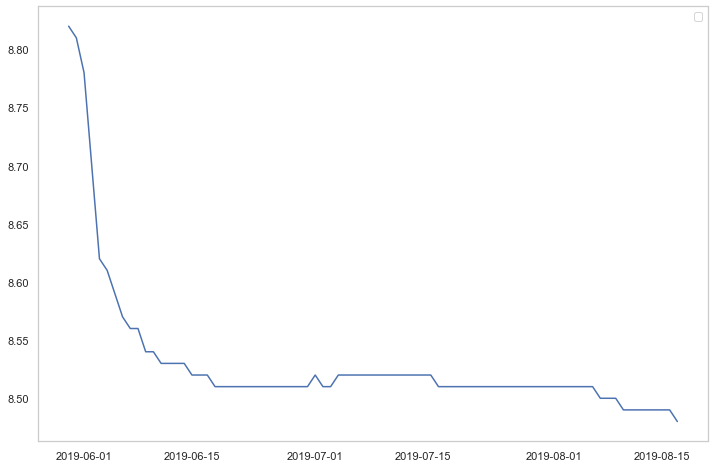

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12,8))
plt.plot(tmp['date'], tmp['point'])
plt.legend(loc='best')
plt.grid()
plt.show()
# 일관성 있게 떨어지고 있음.

## 3-11 영화별 날짜 변화에 따른 평점 변화 확인하기

In [ ]:
movie_pivot = pd.pivot_table(movie, index=["date"], columns=['name'], 
                                         values=['point'])
movie_pivot.head()

point                                                              \
name       0.0MHz 1919 유관순 28일 후 500일의 썸머 가버나움 가장 따뜻한 색, 블루 건축학개론   걸캅스 고양이 춤   
date                                                                            
2019-05-10    NaN     8.56   NaN      NaN  9.6          NaN   NaN  5.49   NaN   
2019-05-11    NaN     8.56   NaN      NaN  9.6          NaN   NaN  5.54   NaN   
2019-05-12    NaN     8.54   NaN      NaN  9.6          NaN   NaN  5.64   NaN   
2019-05-13    NaN     8.54   NaN      NaN  9.6          NaN   NaN  5.66   NaN   
2019-05-14    NaN     8.54   NaN      NaN  9.6          NaN   NaN  5.65   NaN   

                     ...                                                     \
name       고양이를 부탁해  ... 패션 오브 크라이스트 패터슨 퍼펙트 월드 프란시스 하 플로리다 프로젝트 항거:유관순 이야기   
date                 ...                                                      
2019-05-10      NaN  ...         NaN NaN    NaN    NaN      8.59        NaN   
2019-05-11      NaN  ...         NaN NaN    NaN    NaN      8.59        NaN   
2019-05-12      NaN  ...         NaN NaN    NaN    NaN       NaN        NaN   
2019-05-13      NaN  ...         NaN NaN    NaN    NaN       NaN        NaN   
2019-05-14      NaN  ...         NaN NaN    NaN    NaN       NaN        NaN   

                                                  
name         헬보이 호랑이보다 무서운 겨울손님 호텔 뭄바이 황혼에서 새벽까지  
date                                              
2019-05-10  7.22            NaN    NaN       NaN  
2019-05-11  7.23            NaN    NaN       NaN  
2019-05-12  7.22            NaN    NaN       NaN  
2019-05-13  7.22            NaN   9.39       NaN  
2019-05-14  7.22            NaN   9.36       NaN  

[5 rows x 203 columns]

In [ ]:
# 레벨(point)을 없앰.
movie_pivot.columns = movie_pivot.columns.droplevel()

In [ ]:
movie_pivot.head()

name,0.0MHz,1919 유관순,28일 후,500일의 썸머,가버나움,"가장 따뜻한 색, 블루",건축학개론,걸캅스,고양이 춤,고양이를 부탁해,...,패션 오브 크라이스트,패터슨,퍼펙트 월드,프란시스 하,플로리다 프로젝트,항거:유관순 이야기,헬보이,호랑이보다 무서운 겨울손님,호텔 뭄바이,황혼에서 새벽까지
date,,,,,,,,,,,,,,,,,,,,,
2019-05-10,NaN,8.56,NaN,NaN,9.6,NaN,NaN,5.49,NaN,NaN,...,NaN,NaN,NaN,NaN,8.59,NaN,7.22,NaN,NaN,NaN
2019-05-11,NaN,8.56,NaN,NaN,9.6,NaN,NaN,5.54,NaN,NaN,...,NaN,NaN,NaN,NaN,8.59,NaN,7.23,NaN,NaN,NaN
2019-05-12,NaN,8.54,NaN,NaN,9.6,NaN,NaN,5.64,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,7.22,NaN,NaN,NaN
2019-05-13,NaN,8.54,NaN,NaN,9.6,NaN,NaN,5.66,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,7.22,NaN,9.39,NaN
2019-05-14,NaN,8.54,NaN,NaN,9.6,NaN,NaN,5.65,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,7.22,NaN,9.36,NaN


In [ ]:
import platform
from matplotlib import font_manager, rc

path = "c:/Windows/Fonts/malgun.ttf"
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 

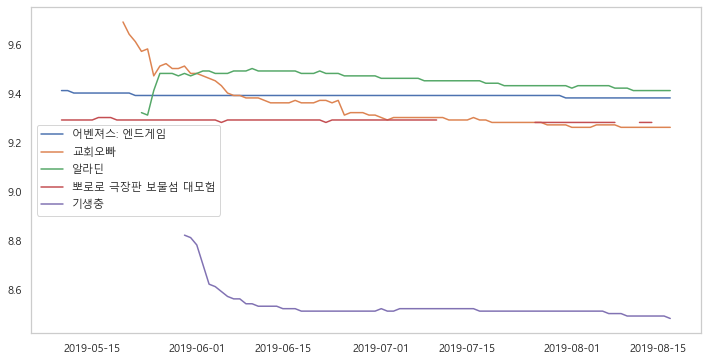

In [ ]:
target_col = ['어벤져스: 엔드게임', '교회오빠', '알라딘', '뽀로로 극장판 보물섬 대모험', '기생충']
plt.figure(figsize=(12,6))
plt.plot(movie_pivot[target_col])
plt.legend(target_col, loc='best')
plt.grid()
plt.show()